## 0. Imports & functions

In [0]:
#imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
% matplotlib inline

import sklearn
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
#import sklearn.cross_validation as cv
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)


## 1. Data 

In [4]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv('dfFinal.csv')

Saving dfFinal.csv to dfFinal.csv


In [5]:
df

,Unnamed: 0,PATNO,EVENT_ID,INFODT,INFODT_date,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,...,DXPOSINS,DXOTHSX,DOMSIDE,num_visits,VISIT_ID,visitsdiff_days,lastDate_diff_days,PDDXDT_diff_days,PDMEDT_diff_days,PDSURGDT_diff_days
0,0,3001,SC,02/2011,2011-02-01,0.0,0.0,0.0,1.0,0.0,...,0,0,2,7,1,0,2707,306,0,0
1,1,3001,V04,03/2012,2012-03-01,1.0,0.0,1.0,1.0,1.0,...,0,0,2,7,2,394,2313,700,0,0
2,2,3001,V06,05/2013,2013-05-01,0.0,0.0,0.0,0.0,0.0,...,0,0,2,7,3,426,1887,1126,0,0
3,3,3001,V08,04/2014,2014-04-01,0.0,0.0,0.0,1.0,0.0,...,0,0,2,7,4,335,1552,1461,0,0
4,4,3001,V10,04/2015,2015-04-01,0.0,0.0,0.0,1.0,0.0,...,0,0,2,7,5,365,1187,1826,0,0
5,5,3001,V12,06/2016,2016-06-01,1.0,0.0,1.0,1.0,0.0,...,0,0,2,7,6,427,760,2253,0,0
6,6,3001,V14,03/2018,2018-03-01,1.0,0.0,1.0,1.0,0.0,...,0,0,2,7,7,638,122,2891,0,0
7,7,3002,SC,03/2011,2011-03-01,1.0,0.0,1.0,1.0,0.0,...,0,1,1,6,1,0,2679,393,0,0
8,8,3002,V04,04/2012,2012-04-01,1.0,0.0,1.0,1.0,0.0,...,0,1,1,6,2,397,2282,790,0,0
9,9,3002,V06,04/2013,2013-04-01,2.0,0.0,3.0,1.0,2.0,...,0,1,1,6,3,365,1917,1155,0,0


In [0]:
#file_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/dfFinal.csv'
#df=pd.read_csv(file_path)
df.drop(columns='Unnamed: 0',inplace=True)
df.drop(columns=['EVENT_ID','INFODT'],inplace=True)
#df.set_index(keys=['PATNO'],inplace=True)
df.head()

,PATNO,INFODT_date,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP2SPCH,NP2SALV,...,DXPOSINS,DXOTHSX,DOMSIDE,num_visits,VISIT_ID,visitsdiff_days,lastDate_diff_days,PDDXDT_diff_days,PDMEDT_diff_days,PDSURGDT_diff_days
0,3001,2011-02-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,2,7,1,0,2707,306,0,0
1,3001,2012-03-01,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,2,7,2,394,2313,700,0,0
2,3001,2013-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,2,7,3,426,1887,1126,0,0
3,3001,2014-04-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,2,7,4,335,1552,1461,0,0
4,3001,2015-04-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,2,7,5,365,1187,1826,0,0


In [0]:
dfAgg=df.groupby('PATNO').agg('median')
dfAgg.drop(columns=['visitsdiff_days','VISIT_ID'],inplace=True)
dfAgg.drop(columns='MSEADLG',inplace=True)
dfAgg['NHY']=dfAgg['NHY'].apply(lambda x: round(x,0))
dfAgg.head()

,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,...,DXRIGID,DXBRADY,DXPOSINS,DXOTHSX,DOMSIDE,num_visits,lastDate_diff_days,PDDXDT_diff_days,PDMEDT_diff_days,PDSURGDT_diff_days
PATNO,,,,,,,,,,,,,,,,,,,,,
3001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2.0,7.0,1552.0,1461.0,0.0,0.0
3002,1.0,0.0,1.0,1.0,0.0,0.0,1.5,2.5,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,6.0,1567.5,1504.5,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,7.0,1552.0,1857.0,0.0,0.0
3006,0.0,0.0,0.5,1.0,0.0,0.0,2.5,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,2.0,2.0,2465.5,333.5,0.0,0.0
3007,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,...,1.0,1.0,0.0,1.0,2.0,1.0,2648.0,90.0,0.0,0.0


In [0]:
dfAgg['NHY'].value_counts()

2.0    692
0.0    683
1.0    203
3.0     69
4.0     24
5.0      3
Name: NHY, dtype: int64

## 2. Split train, test

In [0]:
from sklearn.model_selection import train_test_split
data=dfAgg.drop(columns='NHY')
target=dfAgg['NHY']
train, test = train_test_split(dfAgg, test_size=0.3, random_state=0)
#train.to_pickle("./train_nonTS.pickle")
#test.to_pickle("./test_nonTS.pickle")
print('train counts: {}'.format(train.NHY.value_counts()))

X_train = train.loc[:,train.columns!='NHY']
y_train = train['NHY']
X_test = test.loc[:,train.columns!='NHY']
y_test = test[('NHY')]
print(X_train.shape)
print('test counts: {}'.format(y_test.value_counts()))

train.head()

train counts: 0.0    478
2.0    475
1.0    147
3.0     51
4.0     18
5.0      2
Name: NHY, dtype: int64
(1171, 370)
test counts: 2.0    217
0.0    205
1.0     56
3.0     18
4.0      6
5.0      1
Name: NHY, dtype: int64


,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,...,DXRIGID,DXBRADY,DXPOSINS,DXOTHSX,DOMSIDE,num_visits,lastDate_diff_days,PDDXDT_diff_days,PDMEDT_diff_days,PDSURGDT_diff_days
PATNO,,,,,,,,,,,,,,,,,,,,,
12898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1734.0,0.0,0.0,0.0
41544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,745.5,0.0,0.0,0.0
41284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,455.0,0.0,0.0,0.0
53015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,791.0,0.0,0.0,0.0
4080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,2.0,1.0,2099.0,30.0,0.0,0.0


### Take care of the classes unbalance

In [0]:
from sklearn.utils import resample

def upsampling_NHY(train):
    train_majority = train[train.NHY==0.0]
    train_minority_1 = train[train.NHY==1.0]
    train_minority_2= train[train.NHY==2.0]
    train_minority_3= train[train.NHY==3.0]
    train_minority_4=train[train.NHY==4.0]
    train_minority_5=train[train.NHY==5.0]

    # Upsample minority class
    train_minority_upsampled_1 = resample(train_minority_1, 
                                     replace=True,     # sample with replacement
                                     n_samples=train_majority.shape[0],  # to match majority class
                                     random_state=123) # reproducible results
    train_minority_upsampled_2 = resample(train_minority_2, 
                                     replace=True,     # sample with replacement
                                     n_samples=train_majority.shape[0],  # to match majority class
                                     random_state=123) # reproducible results
    train_minority_upsampled_3 = resample(train_minority_3, 
                                     replace=True,     # sample with replacement
                                     n_samples=train_majority.shape[0],  # to match majority class
                                     random_state=123) # reproducible results
    train_minority_upsampled_4= resample(train_minority_4, 
                                     replace=True,     # sample with replacement
                                     n_samples=train_majority.shape[0],  # to match majority class
                                     random_state=123) # reproducible results
    train_minority_upsampled_5= resample(train_minority_5, 
                                     replace=True,     # sample with replacement
                                     n_samples=train_majority.shape[0],  # to match majority class
                                     random_state=123) # reproducible results

    # Combine majority class with upsampled minority class
    train_upsampled = pd.concat([train_majority, train_minority_upsampled_1,train_minority_upsampled_2,
                                 train_minority_upsampled_3,train_minority_upsampled_4,
                                 train_minority_upsampled_5])

    # Show new class counts
    print(train_upsampled.NHY.value_counts())
    
    return train_upsampled

train_upsampled=upsampling_NHY(train)

5.0    478
4.0    478
3.0    478
2.0    478
1.0    478
0.0    478
Name: NHY, dtype: int64


In [0]:
X_train_up = train_upsampled.loc[:,train.columns!='NHY']
y_train_up= train_upsampled['NHY']
data_up=upsampling_NHY(dfAgg)
target_up=data_up['NHY']
data_up.drop(columns='NHY',inplace=True)

5.0    683
4.0    683
3.0    683
2.0    683
1.0    683
0.0    683
Name: NHY, dtype: int64


In [0]:
import sys
sys.version

'3.5.6 |Anaconda, Inc.| (default, Aug 26 2018, 16:30:03) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train)
X_resampled.shape
logreg_smote = LogisticRegression(random_state=0).fit(X_resampled, y_resampled)

In [0]:
#X_resampled, y_resampled = ADASYN().fit_sample(X, y)
#clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

## 3. Model Training

### Dummy Classifier

In [0]:
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [0]:
print("Train-Score: %.4f, Test-Accuracy: %.4f" % (dummy.score(X_train, y_train), dummy.score(X_test, y_test)))

Train-Score: 0.3664, Test-Accuracy: 0.3260


### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver='newton-cg',random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
logreg_up=LogisticRegression(multi_class='multinomial',solver='newton-cg',random_state=1)
logreg_up.fit(X_train_up, y_train_up)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

### Random Forest

In [0]:
rfc_up = RandomForestClassifier(n_estimators=100, random_state=1)
rfc_up.fit(X_train_up, y_train_up)

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

dict_weight={'0.0':0.4, '2.0':0.4, '1.0':0.4/3, '3.0':0.4/9, '4.0':0.4/27, '5.0':0.4/(27*8)}
rfc_weighted = RandomForestClassifier(n_estimators=100, random_state=1,class_weight='balanced')
rfc_weighted.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

### XGBoost

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,seed=0)
xgb.fit(X_train, y_train)
xgb_up=XGBClassifier(n_jobs=-1,seed=0)
xgb_up.fit(X_train_up, y_train_up)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

### feature importance
do a pairplot of the important features in the original dataset

In [0]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
ImportantFeatures=feature_importances[feature_importances.values>=0.01]
RelevantFeatures=feature_importances[feature_importances.values>0]
RelevantFeaturesList=list(RelevantFeatures.index)
#RelevantFeaturesList
print(sum(ImportantFeatures.values))
print(len(RelevantFeatures)/len(feature_importances))
ImportantFeatures
plt.plot(list(ImportantFeatures.index),list(ImportantFeatures.values),kind='bar')

[0.59281574]
0.8945945945945946


,importance
DOMSIDE,0.068395
PRIMDIAG,0.050340
PDDXDT_diff_days,0.049499
DFRIGIDP,0.029434
NP3FACXP,0.027966
PD_MED_USE,0.025725
NP3BRADY,0.023187
PDMEDYN,0.021384
DFPGDIST,0.019051
DXBRADY,0.018643


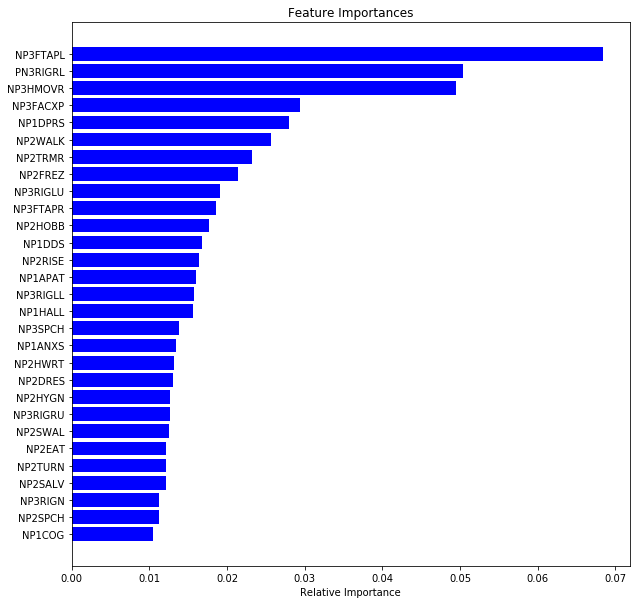

In [0]:
def plot_importantFeatures(clf,X_train,threshold=0.01,figsize=(10,10),color='b'):
    importances=clf.feature_importances_
    importances=importances[importances>=threshold]
    features = X_train.columns
    indices = np.argsort(importances)
    fig = plt.figure(figsize=figsize)
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color=color, align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

plot_importantFeatures(rfc,X_train)

## 3. Results of all algorithms


In [0]:
print("Train-Score-logreg: %.4f, Test-Accuracy-logreg: %.4f" % (logreg.score(X_train, y_train), 
                                                                logreg.score(X_test, y_test)))
print("Train-Score-logreg-up: %.4f, Test-Accuracy-logreg-up: %.4f" % (logreg_up.score(X_train_up, y_train_up), 
                                                                      logreg_up.score(X_test, y_test)))
print("Train-Score-rfc: %.4f, Test-Accuracy-rfc: %.4f" % (rfc.score(X_train, y_train), rfc.score(X_test, y_test)))
print("Train-Score-rfc-up: %.4f, Test-Accuracy-rfc: %.4f" % (rfc_up.score(X_train_up, y_train_up), 
                                                             rfc_up.score(X_test, y_test)))
print("Train-Score-rfc-weighted: %.4f, Test-Accuracy-weighted: %.4f" % (rfc_weighted.score(X_train, y_train), 
                                                             rfc_weighted.score(X_test, y_test)))

print("Train-Score-xgb: %.4f, Test-Accuracy-xgb: %.4f" % (xgb.score(X_train, y_train), 
                                                         xgb.score(X_test, y_test)))
print("Train-Score-xgb-up: %.4f, Test-Accuracy-xgb-up: %.4f" % (xgb_up.score(X_train_up, y_train_up), 
                                                         xgb_up.score(X_test, y_test)))

Train-Score-logreg: 0.9889, Test-Accuracy-logreg: 0.8429
Train-Score-logreg-up: 0.9972, Test-Accuracy-logreg-up: 0.8171
Train-Score-rfc: 1.0000, Test-Accuracy-rfc: 0.8748
Train-Score-rfc-up: 1.0000, Test-Accuracy-rfc: 0.8946
Train-Score-rfc-weighted: 1.0000, Test-Accuracy-weighted: 0.8748
Train-Score-xgb: 0.9880, Test-Accuracy-xgb: 0.8847
Train-Score-xgb-up: 0.9923, Test-Accuracy-xgb-up: 0.8807


### Confusion Matrix

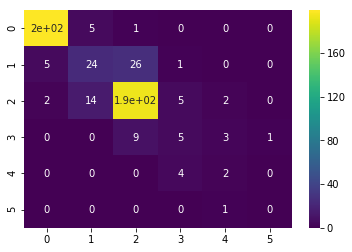

In [0]:
y_pred_logreg=logreg.predict(X_test)
cm_logreg=confusion_matrix(y_test,y_pred_logreg)
cm_logreg_df=pd.DataFrame(cm_logreg,index=[0,1,2,3,4,5],columns=[0,1,2,3,4,5])
import seaborn as sns
sns.heatmap(cm_logreg_df,annot=True,cmap='viridis')

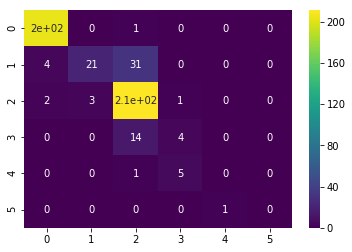

In [0]:
y_pred_rfc=rfc.predict(X_test)
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
cm_rfc_df=pd.DataFrame(cm_rfc,index=[0,1,2,3,4,5],columns=[0,1,2,3,4,5])
sns.heatmap(cm_rfc_df,annot=True,cmap='viridis')

### classification report

In [0]:
#Classifications of LogisticRegression
from sklearn.metrics import classification_report
report_logreg = classification_report(y_test, y_pred_logreg)
print(report_logreg)

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97       205
        1.0       0.56      0.43      0.48        56
        2.0       0.84      0.89      0.87       217
        3.0       0.33      0.28      0.30        18
        4.0       0.25      0.33      0.29         6
        5.0       0.00      0.00      0.00         1

avg / total       0.83      0.84      0.84       503



In [0]:
#Classifications of XGBoost imbalanced
report_rfc = classification_report(y_test, y_pred_rfc)
print(report_rfc)

             precision    recall  f1-score   support

        0.0       0.97      1.00      0.98       205
        1.0       0.88      0.38      0.53        56
        2.0       0.82      0.97      0.89       217
        3.0       0.40      0.22      0.29        18
        4.0       0.00      0.00      0.00         6
        5.0       0.00      0.00      0.00         1

avg / total       0.86      0.87      0.85       503



/Users/alicemartin/miniconda3/envs/project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Classifications of XGBoost balanced
y_pred_rfc_up=rfc_up.predict(X_test)
report_rfc_up = classification_report(y_test, y_pred_rfc_up)
print(report_rfc_up)

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       205
        1.0       0.73      0.68      0.70        56
        2.0       0.89      0.93      0.91       217
        3.0       0.50      0.33      0.40        18
        4.0       0.50      0.17      0.25         6
        5.0       0.00      0.00      0.00         1

avg / total       0.88      0.89      0.89       503



/Users/alicemartin/miniconda3/envs/project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
